In [1]:
import wooldridge

In [2]:
df = wooldridge.data('mroz')

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


In [5]:
df.shape

(753, 22)

In [6]:
df = df.dropna()

In [7]:
df.columns.tolist()

['inlf',
 'hours',
 'kidslt6',
 'kidsge6',
 'age',
 'educ',
 'wage',
 'repwage',
 'hushrs',
 'husage',
 'huseduc',
 'huswage',
 'faminc',
 'mtr',
 'motheduc',
 'fatheduc',
 'unem',
 'city',
 'exper',
 'nwifeinc',
 'lwage',
 'expersq']

In [8]:
import statsmodels.api as sm

In [9]:
y = df['lwage']
x = df['educ']

In [10]:
x = sm.add_constant(data=x)

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
ols_regression = sm.OLS(endog=y, exog=x).fit()

In [12]:
ols_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     56.93
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.76e-13
Time:                        13:25:09   Log-Likelihood:                -441.26
No. Observations:                 428   AIC:                             886.5
Df Residuals:                     426   BIC:                             894.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1852      0.185     -1.000      0.318      -0.549       0.179
educ           0.1086      0.014      7.545      0.000       0.080       0.137
==============================================================================
Omnibus:                       91.833   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.790
Skew:                          -0.956   Prob(JB):                     1.08e-66
Kurtosis:                       6.658   Cond. No.                         72.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y_fitted = ols_regression.fittedvalues

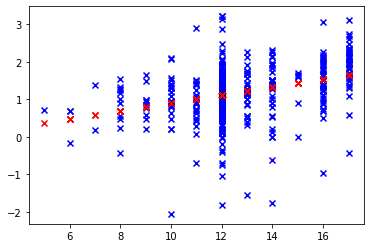

In [14]:
plt.scatter(x['educ'],y, c='b', marker='x', label='Original Values')
plt.scatter(x['educ'], y_fitted, c='r', marker='x', label='Fitted Values')
plt.show()

In [15]:
ols_regression.resid

0      0.091567
1     -0.790075
2      0.395551
3     -1.026464
4      0.188388
         ...   
423   -0.063263
424    0.550270
425    0.542193
426    0.107861
427    0.287902
Length: 428, dtype: float64

In [16]:
round(sum(ols_regression.resid),5)

0.0

In [17]:
ols_regression.ssr

197.0010216102181

In [18]:
ols_regression.ess

26.32641928189122

In [19]:
ols_regression.centered_tss

223.3274408921093

In [20]:
ols_regression.ssr+ols_regression.ess

223.3274408921093

In [21]:
import scipy.stats as st

In [22]:
st.norm.cdf(9)

1.0

In [23]:
import sympy as sp
from sympy.plotting import plot

In [24]:
sp.pi

pi

In [25]:
x = sp.symbols('x')
func = 1/sp.sqrt(2*sp.pi)*sp.exp((-x**2)/2)
func

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

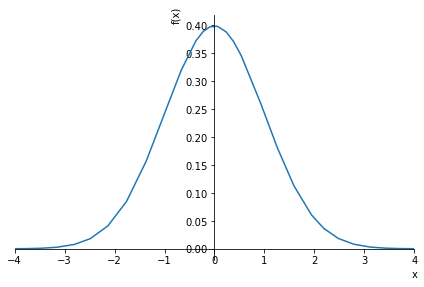

In [26]:
p1 = plot(func, show=True, xlim=(-4, 4))

In [27]:
st.norm.ppf(0.05)

-1.6448536269514729

In [28]:
st.norm.rvs()

1.4695618794365735

In [29]:
# yi = B1+B2xi+ei

In [30]:
import numpy as np

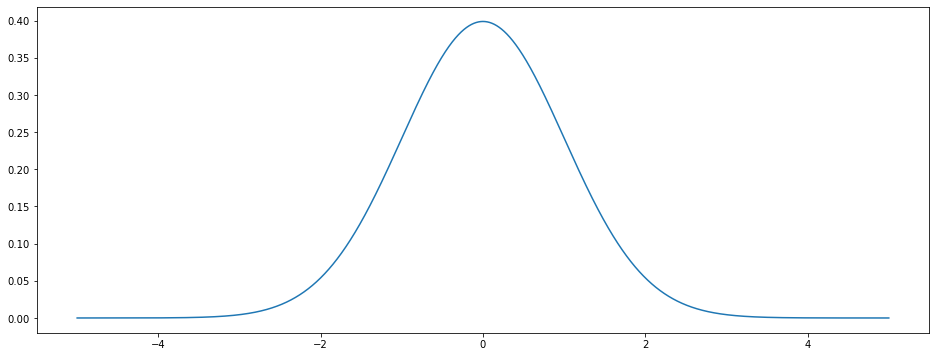

In [32]:
x = np.linspace(-5, 5, 10000)
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, st.norm.pdf(x, 0, 1))
plt.show()

In [44]:
#Era isso q eu queria
x_rvs = st.norm.rvs(loc=0, scale=1, size=10000)

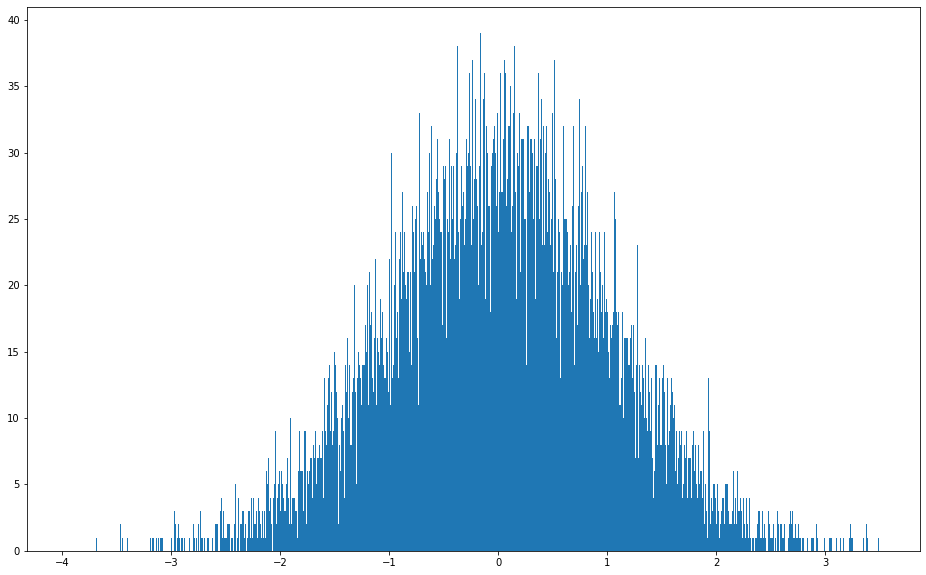

In [48]:

fig, ax = plt.subplots(figsize=(16,10))
ax.hist(x_rvs,bins=1000)
plt.show()

In [50]:
counts = np.random.normal(loc=0, scale=1, size=10000)


<function matplotlib.pyplot.show(close=None, block=None)>

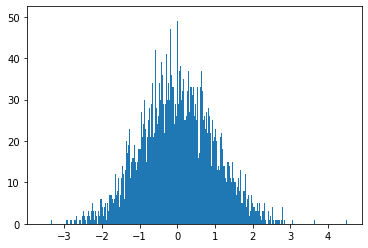

In [51]:
plt.hist(counts, bins=1000)
plt.show